In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [49]:
import imageio.v3 as iio
from os import listdir
def load_data(path):
    names=listdir(path)
    nf=len(names)
    for i in range(nf):
        name=path+'/'+names[i]
        im = torch.tensor(iio.imread(name)).float()
        #print(im.shape)
        if i==0:
            x=torch.zeros(nf,im.shape[0]*im.shape[1])
        x[i,:]=im.view(-1)
    return x
            
b=load_data('C:\\Work\\Teaching\\Machine Learning\\Data\\background')
f=load_data('C:\\Work\\Teaching\\Machine Learning\\Data\\faces')

NameError: name 'g' is not defined

In [72]:
names=listdir('C:\\Work\\Teaching\\Machine Learning\\Data\\background')
names[191]

'B1_00192.pgm'

In [52]:
x=torch.cat((f,b),dim=0)
mf=torch.mean(f,dim=0)
X=f-mf
u,d,vt=torch.linalg.svd(X)

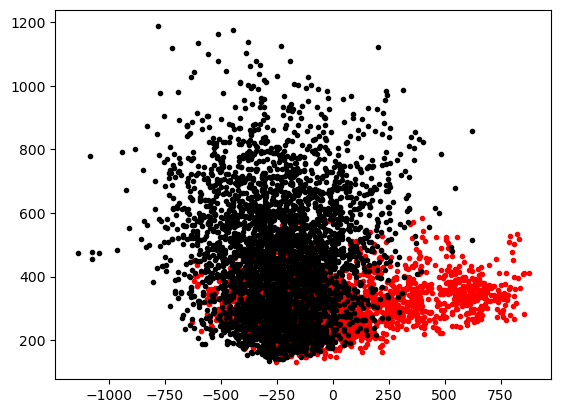

In [78]:
fr=mf+c@P.t()
br=mf+cb@P.t()
d=torch.sum((f-fr)**2,dim=1)**0.5
db=torch.sum((b-br)**2,dim=1)**0.5
plt.plot(c[:,1],d,'r.')
plt.plot(cb[:,1],db,'k.')

(array([  3.,  15.,  27.,  63.,  79., 130., 156., 178., 170., 190., 182.,
        192., 185., 189., 136., 122.,  96.,  75.,  53.,  56.,  32.,  28.,
         19.,  14.,   9.,  11.,  10.,   2.,   3.,   4.]),
 array([129.79957581, 144.90293884, 160.00630188, 175.10968018,
        190.21304321, 205.31640625, 220.41976929, 235.52314758,
        250.62651062, 265.72988892, 280.83325195, 295.93661499,
        311.03997803, 326.14334106, 341.2467041 , 356.35006714,
        371.45343018, 386.55679321, 401.66018677, 416.7635498 ,
        431.86691284, 446.97027588, 462.07363892, 477.17700195,
        492.28036499, 507.38372803, 522.48712158, 537.5904541 ,
        552.69384766, 567.79718018, 582.90057373]),
 <BarContainer object of 30 artists>)

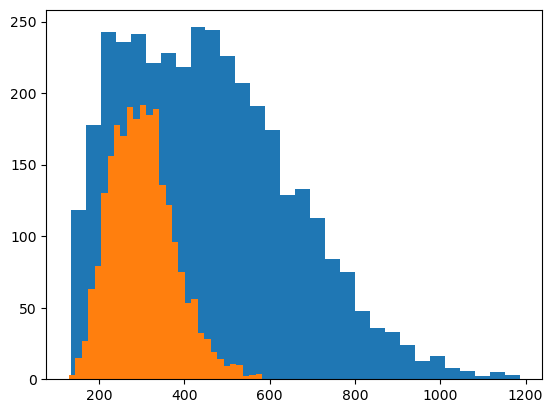

In [81]:
plt.hist(db,30)
plt.hist(d,30)


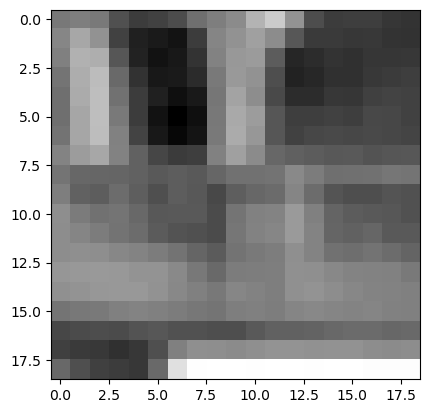

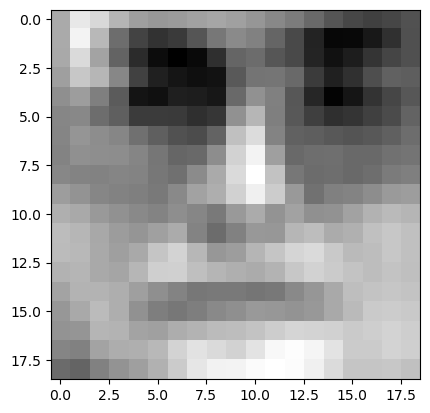

In [75]:
fr=mf+c@P.t()
br=mf+cb@P.t()
i=191
plt.imshow(b[i,:].reshape(19,19),cmap='gray')
plt.show()
plt.imshow(br[i,:].reshape(19,19),cmap='gray')
plt.show()

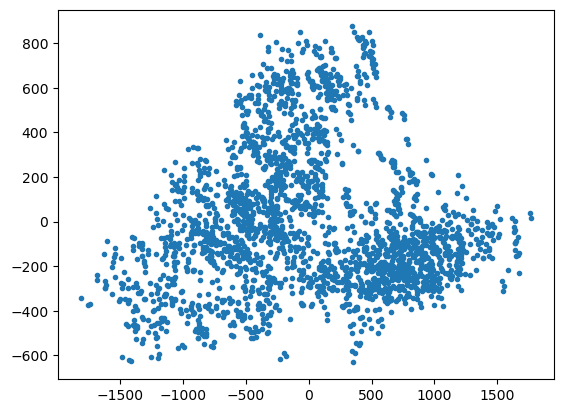

In [64]:
P=vt[:20,:].t()
c=X@P
plt.plot(c[:,0],c[:,1],'.')

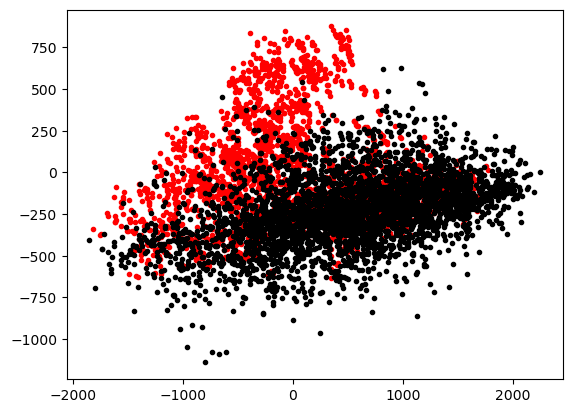

In [73]:
Xb=b-mf
cb=Xb@P
plt.plot(c[:,0],c[:,1],'r.')
plt.plot(cb[:,0],cb[:,1],'k.')

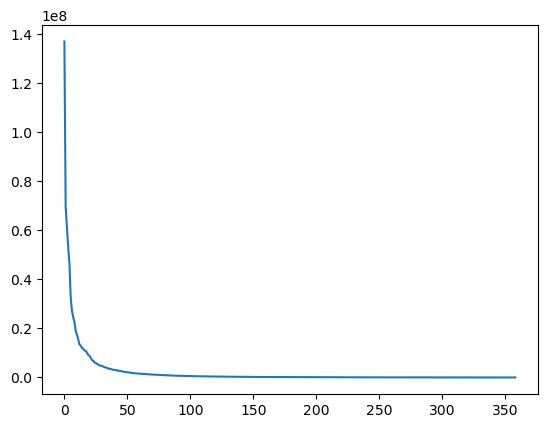

In [55]:
plt.plot(d[2:]**2)

In [11]:
from scipy.io import loadmat
m=loadmat('c:/work/teaching/machine learning/data/data_clust')
m.keys()
x=torch.tensor(m['x']).float()
y=torch.tensor(m['y']).long().squeeze()
C=torch.max(y).item()+1
print(x.shape,y.shape)

torch.Size([13000, 640]) torch.Size([13000])


In [90]:
mx=torch.mean(x,dim=0)
X=x-mx
u,d,vt=torch.linalg.svd(X)
print(vt[0:10,:])

tensor([[-0.0169,  0.0367, -0.0632,  ..., -0.0614,  0.0240, -0.0467],
        [ 0.0435, -0.0596,  0.0356,  ...,  0.0113, -0.0946, -0.0486],
        [ 0.0227,  0.0649,  0.0464,  ...,  0.0200,  0.0062, -0.0197],
        ...,
        [-0.0512,  0.0352, -0.0615,  ...,  0.0366,  0.0561, -0.0188],
        [ 0.0078,  0.0458,  0.0166,  ...,  0.0346, -0.0115,  0.0176],
        [-0.0138,  0.0613,  0.0264,  ..., -0.0208,  0.0025,  0.0044]])


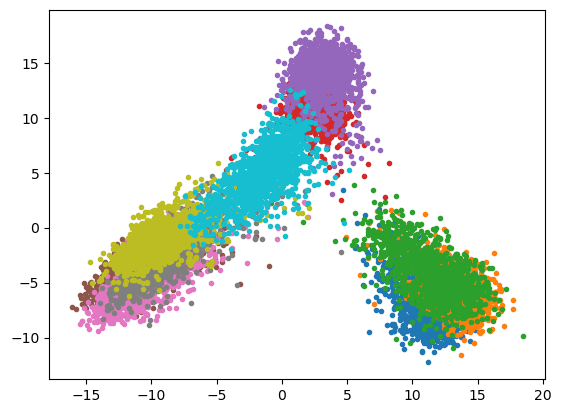

In [95]:
P=vt[0:2,:]
c=X@P.t()
for i in range(C):
    plt.plot(c[y==i,0],c[y==i,1],'.')

In [25]:
def eminit(x,C):
    j=torch.randint(x.shape[0],(1,1))[0,0]
    xj=x[j,:]
    S=[j.item()]
    d=torch.sum((x-xj)**2,1)
    for i in range(C-1):
        j=torch.argmax(d).item()
        S.append(j)
        xj=x[j,:]
        d1=torch.sum((x-xj)**2,1)
        d[d1<d]=d1[d1<d]
    return S
#S=torch.randint(x.shape[0],(C,1))[:,0]
S=eminit(x,C)
xs=x[S,:]
d=torch.nn.functional.pdist(xs)
print(xs.shape,torch.mean(d))

torch.Size([10, 640]) tensor(48.9049)


0 0.8503076923076923 0.827086014523077


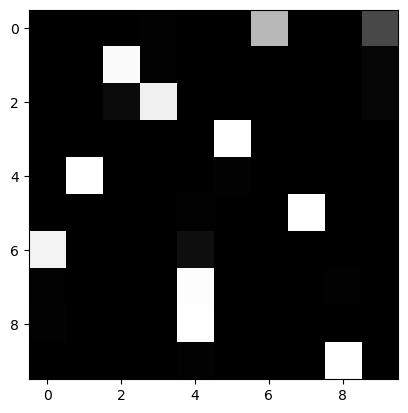

1 0.8491538461538461 0.8392093108556308
2 0.978 0.952257391688867
3 0.7097692307692308 0.71404691852269
4 0.8329230769230769 0.821416727672029
0.8440307692307693 0.8308032726524587


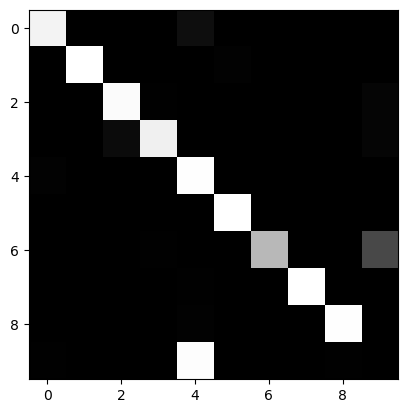

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import adjusted_rand_score
accs=[]
ars=[]
for it in range(5):
    S=eminit(x,C)
    #km = KMeans(n_clusters=C, n_init=1,init=x[S,:]).fit(x.numpy())
    #km = KMeans(n_clusters=C, n_init=1,init='k-means++').fit(x.numpy())
    km = KMeans(n_clusters=C, n_init=1,init='random').fit(x.numpy())
    cm=contingency_matrix(y.numpy(),km.labels_)
    i,j=linear_sum_assignment(cm,maximize=True)
    cm1=contingency_matrix(j[y.numpy()],km.labels_)
    acc=np.sum(np.diag(cm1))/x.shape[0]
    ar=adjusted_rand_score(y.numpy(),km.labels_)
    accs.append(acc)
    ars.append(ar)
    print(it,acc,ar)
    if it==0:
        plt.imshow(cm,cmap='gray')
        plt.show()
        plt.imshow(cm1,cmap='gray')
print(np.mean(accs),np.mean(ars))

In [20]:
print(np.mean(accs),np.mean(ars))

0.5389999999999999 0.4978083878690753


In [56]:
x = np.loadtxt("c:/work/teaching/machine learning/data/hmm_pb1.csv", delimiter=',')
x = torch.tensor(x).long()-1
print(x)

tensor([0, 1, 4, 4, 0, 2, 5, 2, 1, 2, 5, 5, 0, 2, 2, 1, 2, 3, 2, 0, 1, 1, 3, 1,
        4, 5, 2, 1, 0, 4, 4, 1, 1, 4, 2, 3, 0, 5, 5, 0, 4, 4, 1, 5, 1, 0, 0, 2,
        5, 0, 3, 2, 0, 1, 1, 5, 2, 2, 0, 1, 0, 5, 3, 2, 1, 2, 0, 0, 4, 0, 1, 3,
        0, 2, 1, 5, 0, 5, 5, 0, 5, 5, 4, 3, 5, 4, 1, 2, 2, 0, 4, 5, 1, 5, 2, 5,
        5, 2, 2, 2, 5, 5, 5, 5, 4, 0, 1, 5, 5, 5, 1, 5, 5, 5, 2, 4, 1, 5, 2, 5,
        1, 5, 5, 0, 2, 0, 0, 3, 4, 5, 1, 2, 0, 2, 5, 1, 5, 5, 2, 4, 3, 4, 5, 2,
        2, 1, 5, 1, 5, 2, 2, 1, 4, 2, 5, 4, 2, 4, 1, 0, 2, 5, 1, 4, 4, 0, 5, 5,
        5, 5, 0, 4, 1, 3, 5, 0, 1, 3, 2, 0, 2, 2, 0, 1, 1, 5, 5, 5, 4, 3, 2, 2,
        2, 5, 2, 1, 1, 2, 0, 3, 4, 4, 1, 4, 3, 2, 0, 5, 0, 1, 5, 3, 1, 5, 5, 2,
        0, 1, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
        5, 3, 3, 5, 5, 1, 1, 5, 5, 2, 5, 5, 1, 4, 5, 2, 5, 3, 3, 5, 5, 5, 5, 1,
        3, 5, 1, 5, 5, 5, 5, 5, 5, 3, 2])


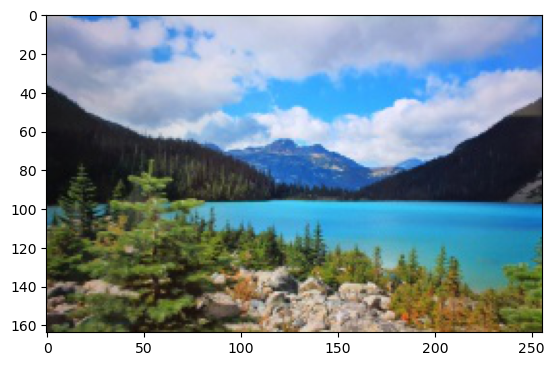

In [10]:
import imageio.v3 as iio
im = iio.imread('C:\\Work\\Teaching\\Machine Learning\\Data\scene256.jpg')
im=im.astype(float)/256
plt.imshow(im)